In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import RootMeanSquaredError
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
housing = fetch_california_housing()

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [ ]:
X_train.shape

(11610, 8)

In [ ]:
X_test.shape

(5160, 8)

In [ ]:
X_valid.shape

(3870, 8)

In [ ]:
y_train.shape

(11610,)

In [ ]:
y_test.shape

(5160,)

In [ ]:
y_valid.shape

(3870,)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

In [ ]:
X_train.shape[1:]

(8,)

In [ ]:
model = Sequential([
    Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    Dense(1)
])
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=[RootMeanSquaredError(), 'mean_absolute_percentage_error'])

In [ ]:
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 3ms/step - loss: 0.9309 - root_mean_squared_error: 0.9648 - mean_absolute_percentage_error: 39.5973 - val_loss: 0.5704 - val_root_mean_squared_error: 0.7552 - val_mean_absolute_percentage_error: 35.8222
Epoch 2/20
363/363 [==============================] - 1s 3ms/step - loss: 0.5418 - root_mean_squared_error: 0.7360 - mean_absolute_percentage_error: 32.2698 - val_loss: 0.4953 - val_root_mean_squared_error: 0.7038 - val_mean_absolute_percentage_error: 31.4511
Epoch 3/20
363/363 [==============================] - 1s 3ms/step - loss: 0.4972 - root_mean_squared_error: 0.7051 - mean_absolute_percentage_error: 30.0392 - val_loss: 0.4770 - val_root_mean_squared_error: 0.6907 - val_mean_absolute_percentage_error: 29.7552
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4688 - root_mean_squared_error: 0.6847 - mean_absolute_percentage_error: 28.8840 - val_loss: 0.4492 - val_root_mean_squared_error: 0.6702 - val_

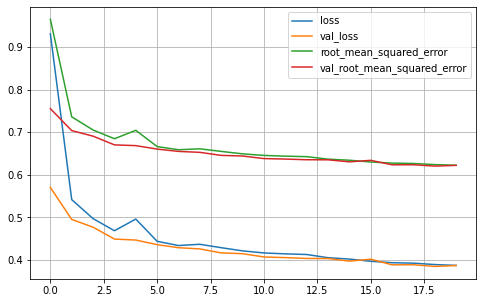

In [ ]:
pd.DataFrame(history.history)[['loss', 'val_loss', 'root_mean_squared_error', 'val_root_mean_squared_error']].plot(figsize=(8,5))
plt.grid(True)
plt.show()

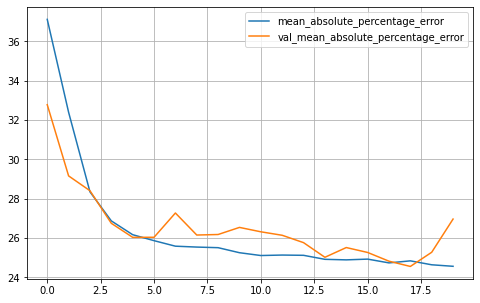

In [ ]:
pd.DataFrame(history.history)[['mean_absolute_percentage_error', 'val_mean_absolute_percentage_error']].plot(figsize=(8,5))
plt.grid(True)
plt.show()

In [ ]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.4546 - root_mean_squared_error: 0.6742 - mean_absolute_percentage_error: 26.3700


In [ ]:
X_new = X_test[:3]
X_pred = model.predict(X_new)
X_pred

1/1 [==============================] - 0s 101ms/step


array([[3.5043275],
       [2.2214751],
       [1.6924994]], dtype=float32)

In [ ]:
y_test[:3]

array([3.9  , 1.591, 1.958])